In [326]:
import json

In [327]:
def load_json(filename):
    with open(filename, "r") as f:
        return json.load(f)

all_results = load_json("results.json")

In [328]:
cache_ext_results = []
baseline_results = []
cache_ext_mmap_results = []
baseline_mmap_results = []

for result in all_results:
    if result["cgroup"] == "cache_ext_test":
        if result["enable_mmap"]:
            cache_ext_mmap_results.append(result)
        else:
            cache_ext_results.append(result)
    else:
        if result["enable_mmap"]:
            baseline_mmap_results.append(result)
        else:
            baseline_results.append(result)

In [329]:
cache_ext_results[0]

{'enable_mmap': False,
 'cgroup': 'cache_ext_test',
 'run_id': 'e3d684cdfe504f00b97a6e2475bf8074',
 'results': {'keys_failed': 0,
  'update_throughput_avg': 1874.85,
  'insert_throughput_avg': 0.0,
  'read_throughput_avg': 1807.66,
  'scan_throughput_avg': 0.0,
  'read_modify_write_throughput_avg': 0.0,
  'throughput_avg': 3682.51,
  'update_latency_avg': 2116134.63,
  'update_latency_p99': 34428677.5,
  'insert_latency_avg': 0.0,
  'insert_latency_p99': 0.0,
  'read_latency_avg': 2219117.05,
  'latency_avg': 2219117.05,
  'read_latency_p99': 34159933.24,
  'latency_p99': 34159933.24,
  'scan_latency_avg': 0.0,
  'scan_latency_p99': 0.0,
  'read_modify_write_latency_avg': 0.0,
  'read_modify_write_latency_p99': 0.0}}

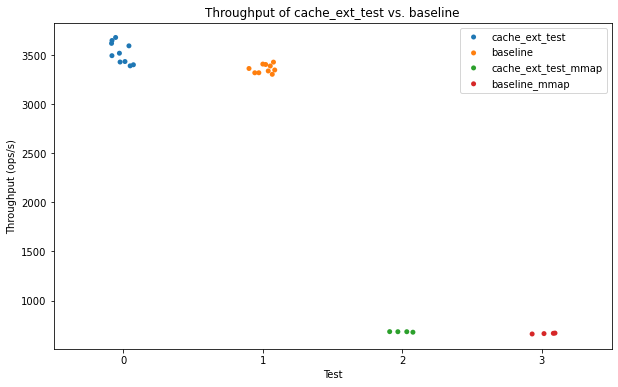

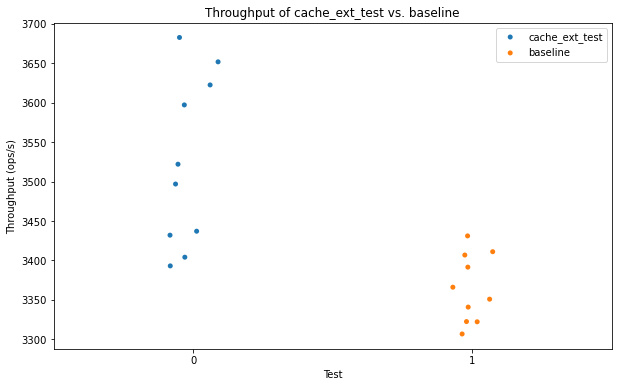

In [330]:
cache_ext_throughputs = [result["results"]["throughput_avg"] for result in cache_ext_results]
cache_ext_mmap_throughputs = [result["results"]["throughput_avg"] for result in cache_ext_mmap_results]
baseline_throughputs = [result["results"]["throughput_avg"] for result in baseline_results]
baseline_mmap_throughputs = [result["results"]["throughput_avg"] for result in baseline_mmap_results]

# Plot the results with matplotlib
# Use a strip plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title("Throughput of cache_ext_test vs. baseline")
plt.ylabel("Throughput (ops/s)")
plt.xlabel("Test")
plt.xticks([0, 1, 2, 3], ["cache_ext_test", "baseline", "cache_ext_test_mmap", "baseline_mmap"])
sns.stripplot(data=[cache_ext_throughputs, baseline_throughputs,
                    cache_ext_mmap_throughputs, baseline_mmap_throughputs],
              jitter=True)
plt.legend(["cache_ext_test", "baseline", "cache_ext_test_mmap", "baseline_mmap"])
plt.show()

# Also do a separate plot for non-mmap
plt.figure(figsize=(10, 6))
plt.title("Throughput of cache_ext_test vs. baseline")
plt.ylabel("Throughput (ops/s)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_throughputs, baseline_throughputs],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()


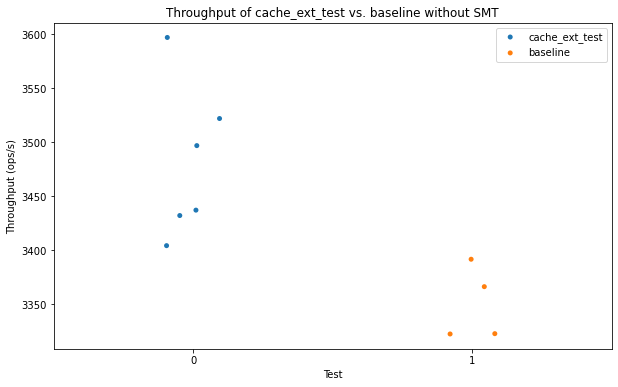

In [331]:
# Load results without SMT
no_smt_results = load_json("results_no_smt.json")

cache_ext_no_smt_results = []
baseline_no_smt_results = []

for result in no_smt_results:
    if result["cgroup"] == "cache_ext_test":
        cache_ext_no_smt_results.append(result)
    else:
        baseline_no_smt_results.append(result)

cache_ext_no_smt_throughputs = [result["results"]["throughput_avg"] for result in cache_ext_no_smt_results]
baseline_no_smt_throughputs = [result["results"]["throughput_avg"] for result in baseline_no_smt_results]

# Plot the results with matplotlib
# Use a strip plot

plt.figure(figsize=(10, 6))
plt.title("Throughput of cache_ext_test vs. baseline without SMT")
plt.ylabel("Throughput (ops/s)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_no_smt_throughputs, baseline_no_smt_throughputs],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()
